## libs

In [1]:
# python utils
import itertools
import inspect

# pre-processing and exploring data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# model building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.python.keras import utils
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.models import Model

## Import Data

In [2]:
from tensorflow.keras.datasets import mnist
(X_train, _), (X_test, _) = mnist.load_data()

In [3]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

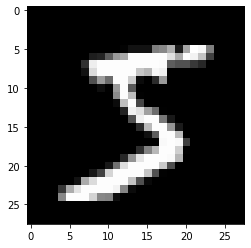

In [4]:
plt.imshow(X_train[0], cmap='gray')

## Preprocessing Data

In [5]:
# normalizing values of input df between 0 and 1
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [6]:
# reshape 2D images into 1D feature array
X_train = np.array([x.flatten() for x in X_train])
X_test = np.array([x.flatten() for x in X_test])

In [7]:
print(np.shape(X_train))
print(np.shape(X_test))

(60000, 784)
(10000, 784)


## Model Builder

In [8]:
def auto_encoder_network_builder(
    input_layer, hidden_layers, output_layer, learning_rate
):
    model = Sequential()

    # first hidden layer
    model.add(
        Dense(
            hidden_layers[0],
            input_dim=input_layer,
            activation="relu",
        )
    )

    # following hidden layers
    for hidden_layer in hidden_layers[1:]:
        model.add(
            Dense(
                hidden_layer,
                activation="relu",
            )
        )

    # output layer
    model.add(Dense(output_layer, activation="sigmoid"))

    # create model
    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizers.Adam(learning_rate=learning_rate),
    )

    return model


def build_models(builder_method, *args_tests):
    """
    Build models with all the combinations of the args_test passed
    """
    builder_args_names = list(inspect.signature(builder_method).parameters.keys())
    return [
        dict((("model", builder_method(*args)),) + tuple(zip(builder_args_names, args)))
        for args in itertools.product(*args_tests)
    ]

## Models Definition

In [9]:
# Parameters definition

# flattened img
input_layer_tests = [784]

# in the form of: encoging_layer1, ..., encoging_layerN, encoded_layer, decoding_layer1, ..., decoding_layerN 
hidden_layers_tests = [[32, 16, 32], [64, 32, 16, 32, 64], [128, 64, 32, 64, 128]]

# same as input
output_layer_tests = [784]

learning_rate_tests = [0.1, 0.01, 0.001]

In [10]:
# building models with all the combinations of the test parameters
models = build_models(
    auto_encoder_network_builder,
    input_layer_tests,
    hidden_layers_tests,
    output_layer_tests,
    learning_rate_tests,
)
models

[{'model': <tensorflow.python.keras.engine.sequential.Sequential at 0x7fb7e68bf8d0>,
  'input_layer': 784,
  'hidden_layers': [32, 16, 32],
  'output_layer': 784,
  'learning_rate': 0.1},
 {'model': <tensorflow.python.keras.engine.sequential.Sequential at 0x7fb7e901f550>,
  'input_layer': 784,
  'hidden_layers': [32, 16, 32],
  'output_layer': 784,
  'learning_rate': 0.01},
 {'model': <tensorflow.python.keras.engine.sequential.Sequential at 0x7fb7e8f73890>,
  'input_layer': 784,
  'hidden_layers': [32, 16, 32],
  'output_layer': 784,
  'learning_rate': 0.001},
 {'model': <tensorflow.python.keras.engine.sequential.Sequential at 0x7fb7e8f16410>,
  'input_layer': 784,
  'hidden_layers': [64, 32, 16, 32, 64],
  'output_layer': 784,
  'learning_rate': 0.1},
 {'model': <tensorflow.python.keras.engine.sequential.Sequential at 0x7fb7e8da27d0>,
  'input_layer': 784,
  'hidden_layers': [64, 32, 16, 32, 64],
  'output_layer': 784,
  'learning_rate': 0.01},
 {'model': <tensorflow.python.keras.engi

## Models Training

In [11]:
from random import sample, shuffle

trained_models = sample(models, len(models))

for model in trained_models:
    model["results"] = model["model"].fit(
        X_train, X_train, epochs=100, batch_size=256, shuffle=True
    )
    model["train_loss"] = model["model"].evaluate(X_train, X_train, verbose=0)
    model["test_loss"] = model["model"].evaluate(X_test, X_test, verbose=0)

Train on 60000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 37us/sample - loss: 0.2440
Epoch 2/100
60000/60000 [==============================] - 1s 25us/sample - loss: 0.1496
Epoch 3/100
60000/60000 [==============================] - 2s 27us/sample - loss: 0.1320
Epoch 4/100
60000/60000 [==============================] - 2s 27us/sample - loss: 0.1226
Epoch 5/100
60000/60000 [==============================] - 1s 25us/sample - loss: 0.1170
Epoch 6/100
60000/60000 [==============================] - 2s 25us/sample - loss: 0.1131
Epoch 7/100
60000/60000 [==============================] - 1s 24us/sample - loss: 0.1100
Epoch 8/100
60000/60000 [==============================] - 1s 22us/sample - loss: 0.1074
Epoch 9/100
60000/60000 [==============================] - 2s 31us/sample - loss: 0.1052
Epoch 10/100
60000/60000 [==============================] - 2s 32us/sample - loss: 0.1032
Epoch 11/100
60000/60000 [==============================] - 2s 31us/sample - loss: 0.1

60000/60000 [==============================] - 1s 22us/sample - loss: 0.1109
Epoch 83/100
60000/60000 [==============================] - 1s 22us/sample - loss: 0.1112
Epoch 84/100
60000/60000 [==============================] - 1s 22us/sample - loss: 0.1112
Epoch 85/100
60000/60000 [==============================] - 1s 22us/sample - loss: 0.1111
Epoch 86/100
60000/60000 [==============================] - 1s 18us/sample - loss: 0.1110
Epoch 87/100
60000/60000 [==============================] - 1s 19us/sample - loss: 0.1112
Epoch 88/100
60000/60000 [==============================] - 1s 22us/sample - loss: 0.1109
Epoch 89/100
60000/60000 [==============================] - 1s 23us/sample - loss: 0.1110
Epoch 90/100
60000/60000 [==============================] - 1s 22us/sample - loss: 0.1110
Epoch 91/100
60000/60000 [==============================] - 1s 21us/sample - loss: 0.1110
Epoch 92/100
60000/60000 [==============================] - 1s 22us/sample - loss: 0.1110
Epoch 93/100
60000/6000

60000/60000 [==============================] - 1s 22us/sample - loss: 0.1055
Epoch 74/100
60000/60000 [==============================] - 1s 22us/sample - loss: 0.1054
Epoch 75/100
60000/60000 [==============================] - 1s 22us/sample - loss: 0.1053
Epoch 76/100
60000/60000 [==============================] - 1s 22us/sample - loss: 0.1053
Epoch 77/100
60000/60000 [==============================] - 1s 22us/sample - loss: 0.1052
Epoch 78/100
60000/60000 [==============================] - 1s 22us/sample - loss: 0.1051
Epoch 79/100
60000/60000 [==============================] - 1s 21us/sample - loss: 0.1050
Epoch 80/100
60000/60000 [==============================] - 1s 17us/sample - loss: 0.1050
Epoch 81/100
60000/60000 [==============================] - 1s 23us/sample - loss: 0.1049
Epoch 82/100
60000/60000 [==============================] - 1s 22us/sample - loss: 0.1048
Epoch 83/100
60000/60000 [==============================] - 1s 21us/sample - loss: 0.1048
Epoch 84/100
60000/6000

60000/60000 [==============================] - 1s 18us/sample - loss: 0.1197
Epoch 65/100
60000/60000 [==============================] - 1s 18us/sample - loss: 0.1196
Epoch 66/100
60000/60000 [==============================] - 1s 18us/sample - loss: 0.1196
Epoch 67/100
60000/60000 [==============================] - 1s 18us/sample - loss: 0.1195
Epoch 68/100
60000/60000 [==============================] - 1s 17us/sample - loss: 0.1194
Epoch 69/100
60000/60000 [==============================] - 1s 18us/sample - loss: 0.1194
Epoch 70/100
60000/60000 [==============================] - 1s 18us/sample - loss: 0.1193
Epoch 71/100
60000/60000 [==============================] - 1s 18us/sample - loss: 0.1193
Epoch 72/100
60000/60000 [==============================] - 1s 19us/sample - loss: 0.1192
Epoch 73/100
60000/60000 [==============================] - 1s 18us/sample - loss: 0.1192
Epoch 74/100
60000/60000 [==============================] - 1s 18us/sample - loss: 0.1191
Epoch 75/100
60000/6000

60000/60000 [==============================] - 1s 19us/sample - loss: 0.1299
Epoch 56/100
60000/60000 [==============================] - 1s 18us/sample - loss: 0.1297
Epoch 57/100
60000/60000 [==============================] - 1s 19us/sample - loss: 0.1298
Epoch 58/100
60000/60000 [==============================] - 1s 19us/sample - loss: 0.1297
Epoch 59/100
60000/60000 [==============================] - 1s 18us/sample - loss: 0.1297
Epoch 60/100
60000/60000 [==============================] - 1s 18us/sample - loss: 0.1297
Epoch 61/100
60000/60000 [==============================] - 1s 19us/sample - loss: 0.1296
Epoch 62/100
60000/60000 [==============================] - 1s 19us/sample - loss: 0.1296
Epoch 63/100
60000/60000 [==============================] - 1s 19us/sample - loss: 0.1297
Epoch 64/100
60000/60000 [==============================] - 1s 19us/sample - loss: 0.1297
Epoch 65/100
60000/60000 [==============================] - 1s 18us/sample - loss: 0.1296
Epoch 66/100
60000/6000

60000/60000 [==============================] - 1s 19us/sample - loss: 0.2185
Epoch 47/100
60000/60000 [==============================] - 1s 19us/sample - loss: 0.2188
Epoch 48/100
60000/60000 [==============================] - 1s 19us/sample - loss: 0.2191
Epoch 49/100
60000/60000 [==============================] - 1s 19us/sample - loss: 0.2189
Epoch 50/100
60000/60000 [==============================] - 1s 19us/sample - loss: 0.2187
Epoch 51/100
60000/60000 [==============================] - 1s 19us/sample - loss: 0.2184
Epoch 52/100
60000/60000 [==============================] - 1s 18us/sample - loss: 0.2189
Epoch 53/100
60000/60000 [==============================] - 1s 19us/sample - loss: 0.2194
Epoch 54/100
60000/60000 [==============================] - 1s 19us/sample - loss: 0.2191
Epoch 55/100
60000/60000 [==============================] - 1s 19us/sample - loss: 0.2187
Epoch 56/100
60000/60000 [==============================] - 1s 19us/sample - loss: 0.2189
Epoch 57/100
60000/6000

60000/60000 [==============================] - 2s 27us/sample - loss: 0.0935
Epoch 38/100
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0931
Epoch 39/100
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0932
Epoch 40/100
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0931
Epoch 41/100
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0930
Epoch 42/100
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0931
Epoch 43/100
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0927
Epoch 44/100
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0927
Epoch 45/100
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0928
Epoch 46/100
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0927
Epoch 47/100
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0927
Epoch 48/100
60000/6000

60000/60000 [==============================] - 2s 27us/sample - loss: 0.2631
Epoch 29/100
60000/60000 [==============================] - 2s 28us/sample - loss: 0.2631
Epoch 30/100
60000/60000 [==============================] - 2s 27us/sample - loss: 0.2631
Epoch 31/100
60000/60000 [==============================] - 2s 28us/sample - loss: 0.2631
Epoch 32/100
60000/60000 [==============================] - 2s 27us/sample - loss: 0.2631
Epoch 33/100
60000/60000 [==============================] - 2s 27us/sample - loss: 0.2631
Epoch 34/100
60000/60000 [==============================] - 2s 27us/sample - loss: 0.2631
Epoch 35/100
60000/60000 [==============================] - 2s 28us/sample - loss: 0.2631
Epoch 36/100
60000/60000 [==============================] - 2s 27us/sample - loss: 0.2631
Epoch 37/100
60000/60000 [==============================] - 2s 27us/sample - loss: 0.2631
Epoch 38/100
60000/60000 [==============================] - 2s 28us/sample - loss: 0.2631
Epoch 39/100
60000/6000

60000/60000 [==============================] - 1s 23us/sample - loss: 0.2631
Epoch 20/100
60000/60000 [==============================] - 1s 23us/sample - loss: 0.2631
Epoch 21/100
60000/60000 [==============================] - 1s 23us/sample - loss: 0.2631
Epoch 22/100
60000/60000 [==============================] - 1s 23us/sample - loss: 0.2631
Epoch 23/100
60000/60000 [==============================] - 1s 23us/sample - loss: 0.2631
Epoch 24/100
60000/60000 [==============================] - 1s 23us/sample - loss: 0.2631
Epoch 25/100
60000/60000 [==============================] - 1s 20us/sample - loss: 0.2630
Epoch 26/100
60000/60000 [==============================] - 1s 18us/sample - loss: 0.2631
Epoch 27/100
60000/60000 [==============================] - 1s 21us/sample - loss: 0.2631
Epoch 28/100
60000/60000 [==============================] - 1s 23us/sample - loss: 0.2631
Epoch 29/100
60000/60000 [==============================] - 1s 23us/sample - loss: 0.2630
Epoch 30/100
60000/6000

# Results

### Top Models

In [12]:
# Sorting by test dataset accuracy, from higher to lower
models_ranking = sorted(trained_models, key=lambda d: d['test_loss'], reverse=False)
for i, model in enumerate(models_ranking):
    print("TOP {}:".format(i + 1))
    print("    test loss: {}".format(model["test_loss"]))
    print("    train loss: {}".format(model["train_loss"]))
    print("    hidden_layers: {}".format(model["hidden_layers"]))
    print("    learning_rate: {}".format(model["learning_rate"]))
    print()

TOP 1:
    test loss: 0.0847115282535553
    train loss: 0.08475983072121938
    hidden_layers: [128, 64, 32, 64, 128]
    learning_rate: 0.001

TOP 2:
    test loss: 0.0925959942817688
    train loss: 0.09250065065224966
    hidden_layers: [128, 64, 32, 64, 128]
    learning_rate: 0.01

TOP 3:
    test loss: 0.10357633001804352
    train loss: 0.104005342400074
    hidden_layers: [64, 32, 16, 32, 64]
    learning_rate: 0.001

TOP 4:
    test loss: 0.11229880361557007
    train loss: 0.11286523708899816
    hidden_layers: [64, 32, 16, 32, 64]
    learning_rate: 0.01

TOP 5:
    test loss: 0.1164587537765503
    train loss: 0.11776274100542068
    hidden_layers: [32, 16, 32]
    learning_rate: 0.001

TOP 6:
    test loss: 0.12804478523731233
    train loss: 0.12907816446622214
    hidden_layers: [32, 16, 32]
    learning_rate: 0.01

TOP 7:
    test loss: 0.21776509437561034
    train loss: 0.21758063333829245
    hidden_layers: [32, 16, 32]
    learning_rate: 0.1

TOP 8:
    test loss: 

## Get best model to plot other analysis

In [13]:
best_model = models_ranking[0]
best_model

{'model': <tensorflow.python.keras.engine.sequential.Sequential at 0x7fb7e89ae250>,
 'input_layer': 784,
 'hidden_layers': [128, 64, 32, 64, 128],
 'output_layer': 784,
 'learning_rate': 0.001,
 'results': <tensorflow.python.keras.callbacks.History at 0x7fb7d967bf10>,
 'train_loss': 0.08475983072121938,
 'test_loss': 0.0847115282535553}

## Train Loss over epochs

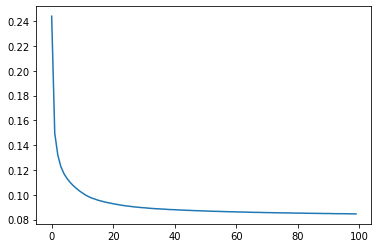

In [14]:
plt.plot(best_model["results"].history["loss"])

## Examples of Decoded images (test set)
- Original images in the first line and decoded images in the second line

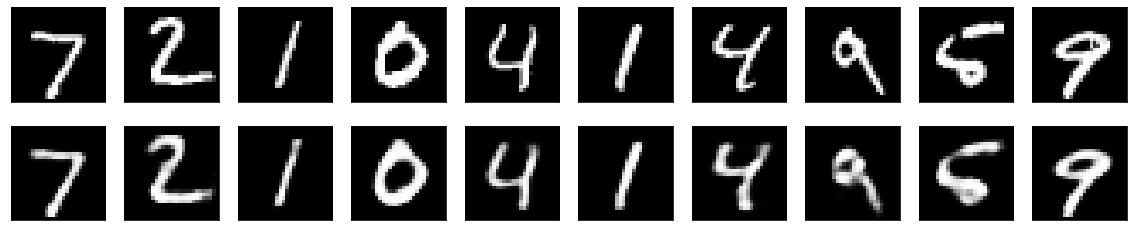

In [15]:
decoded_images = best_model["model"].predict(X_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

## Visualize first hidden layer ouput

In [16]:
def get_intermediate_layer_model(model, layer_index):
    return Model(inputs=model.input, outputs=model.layers[layer_index].output)

In [17]:
first_hidden_layer_model = get_intermediate_layer_model(best_model['model'], 0)

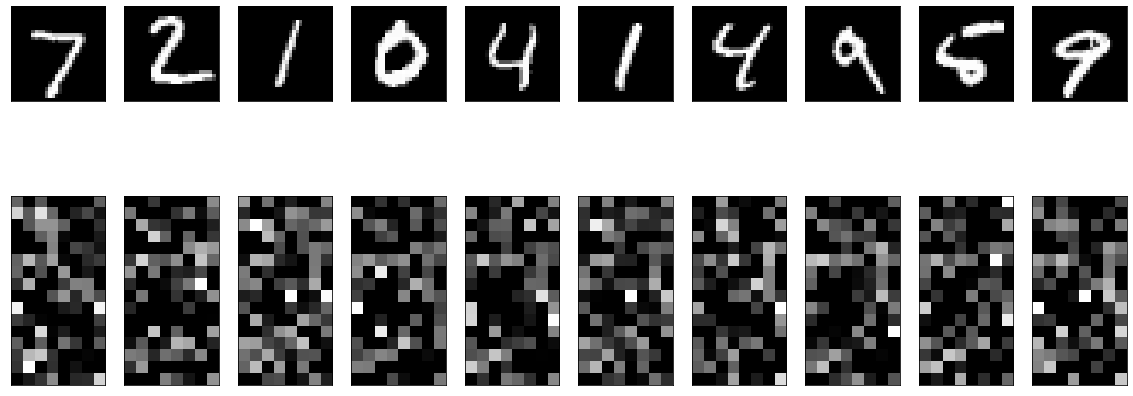

In [18]:
n = 10

encoded_images = first_hidden_layer_model.predict(X_test)

plt.figure(figsize=(20, 8))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # encoded
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_images[i].reshape(16, 8)) # 128 outputs reshaped as retangle for visualization
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

- Original images in the first line and encoded by the first hidden layer in the second line